# Association Rule Mining

### Introduction

+ A typical example of association rule mining is market basket analysis. 
+ This process analyzes transaction data to find associations between the different items that customers place in their “shopping baskets”. 
+ The discovery of these associations can help retailers develop marketing strategies by understanding which items are frequently purchased together by customers. 
+ Also, online retailers can develop a recommendation system based on association rule mining.

In this exercise, we are going to utilize a dataset downloaded from Kaggle (https://www.kaggle.com/irfanasrullah/groceries). Please see the data description on the site, if you are interested in details. Please note that the file format is somewhat different from what we used to be familiar with. Tuples contain itemsets purchased together in a transaction. Therefore, each tuple contains a different number of attributes, i.e., items. The ultimate goal is to find strong associations among items. I left up to six items per transaction on purpose. If there were more than six items, I deleted them. Let's open the data. There are 9,835 tuples.


In [77]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

## This loads the csv file from disk
basket_data = pd.read_csv("./groceries/groceries_modified.csv", sep = ",", header = None )

print(basket_data.head(20))
## print the dimension of the data
print(basket_data.shape)

                            0                    1                      2  \
0                citrus fruit  semi-finished bread              margarine   
1              tropical fruit               yogurt                 coffee   
2                  whole milk                  NaN                    NaN   
3                   pip fruit               yogurt           cream cheese   
4            other vegetables           whole milk         condensed milk   
5                  whole milk               butter                 yogurt   
6                  rolls/buns                  NaN                    NaN   
7            other vegetables             UHT-milk             rolls/buns   
8               potted plants                  NaN                    NaN   
9                  whole milk              cereals                    NaN   
10             tropical fruit     other vegetables            white bread   
11               citrus fruit       tropical fruit             whole milk   

You can see a lot of NaN from the Pandas dataframe. It's because they were empty in the original data. You may be interested in how many unique items are actually in the data.

In [78]:
items = list()
for attr in range(basket_data.shape[1]):
    items.extend(list(basket_data[attr].unique()))
print(set(items))
print(len(set(items)))

{nan, 'light bulbs', 'nut snack', 'mustard', 'cocoa drinks', 'yogurt', 'specialty chocolate', 'frozen fruits', 'cat food', 'processed cheese', 'white wine', 'shopping bags', 'misc. beverages', 'hair spray', 'dessert', 'organic products', 'newspapers', 'potted plants', 'frozen dessert', 'seasonal products', 'dental care', 'butter milk', 'soap', 'brandy', 'sugar', 'canned beer', 'decalcifier', 'female sanitary products', 'salt', 'artif. sweetener', 'butter', 'cookware', 'curd cheese', 'rum', 'Instant food products', 'semi-finished bread', 'pasta', 'rolls/buns', 'honey', 'finished products', 'domestic eggs', 'cling film/bags', 'flower soil/fertilizer', 'chocolate marshmallow', 'specialty fat', 'soft cheese', 'cake bar', 'cleaner', 'specialty cheese', 'detergent', 'hard cheese', 'bottled beer', 'sausage', 'herbs', 'fish', 'sliced cheese', 'coffee', 'ketchup', 'frozen potato products', 'preservation products', 'salty snack', 'soda', 'jam', 'dish cleaner', 'male cosmetics', 'hygiene articles

### Preprocessing

There are 168 items in total that made up the entire data. Let's find some interesting associations between them!

Before starting the fun part, we need to preprocess the dataset. The library (MLXtend) requires 1/0 representation for attributes. With that being said, the shape of the dataframe should be changed. As there are 168 unique items, the number of columns should be 168. In tuples, the values should represent whether each item occurs or not in the transaction. If an item is in the basket, it should be represented as 1. If not, it should be represented as 0.

In [79]:
# Create empty list to contain the converted data
converted_vals = []
for index, row in basket_data.iterrows():
    labels = {}
    # Find items that do not occur in the transaction
    not_occurred = list(set(items) - set(row))
    # Find items that occur in the transaction
    occurred = list(set(items).intersection(row))
    for nc in not_occurred:
        labels[nc] = 0
    for occ in occurred:
        labels[occ] = 1
    converted_vals.append(labels)

converted_basket = pd.DataFrame(converted_vals)
print(converted_basket.head())

   light bulbs  nut snack  mustard  cocoa drinks  yogurt  specialty chocolate  \
0            0          0        0             0       0                    0   
1            0          0        0             0       1                    0   
2            0          0        0             0       0                    0   
3            0          0        0             0       1                    0   
4            0          0        0             0       0                    0   

   frozen fruits  cat food  processed cheese  white wine  ...  berries  \
0              0         0                 0           0  ...        0   
1              0         0                 0           0  ...        0   
2              0         0                 0           0  ...        0   
3              0         0                 0           0  ...        0   
4              0         0                 0           0  ...        0   

   ice cream  pudding powder  other vegetables  frozen fish  NaN  \


If you look at the table carefully, you will find one unwelcomed guest, "NaN". It was included to process empty values, now plays like a real value. We should drop this. You see the importance of data preprocessing. 

In [80]:
converted_basket = converted_basket.drop([np.nan], 1)  
print(converted_basket.head())

   light bulbs  nut snack  mustard  cocoa drinks  yogurt  specialty chocolate  \
0            0          0        0             0       0                    0   
1            0          0        0             0       1                    0   
2            0          0        0             0       0                    0   
3            0          0        0             0       1                    0   
4            0          0        0             0       0                    0   

   frozen fruits  cat food  processed cheese  white wine  ...  flour  berries  \
0              0         0                 0           0  ...      0        0   
1              0         0                 0           0  ...      0        0   
2              0         0                 0           0  ...      0        0   
3              0         0                 0           0  ...      0        0   
4              0         0                 0           0  ...      0        0   

   ice cream  pudding powd

### Implementation

Now It's time for fun. You will create association rules between attributes. You need to change minimum support and/or other parameters to filter out less interesting rules.

In [81]:
frequent_itemsets = apriori(converted_basket, min_support=0.3, use_colnames=True)

print(frequent_itemsets.head())

Empty DataFrame
Columns: [support, itemsets]
Index: []


You got no frequent itemsets. You have relatively large transactions, so having high support is challenging. You have to tune this parameter to get a good number of candidates.

In [82]:
frequent_itemsets = apriori(converted_basket, min_support=0.04, use_colnames=True)

print(frequent_itemsets)

     support                             itemsets
0   0.125674                             (yogurt)
1   0.055719                      (shopping bags)
2   0.047077                         (newspapers)
3   0.068531                        (canned beer)
4   0.049720                             (butter)
5   0.159329                         (rolls/buns)
6   0.047992                      (domestic eggs)
7   0.061922                       (bottled beer)
8   0.093950                            (sausage)
9   0.042095                             (coffee)
10  0.135740                               (soda)
11  0.104830                     (tropical fruit)
12  0.042908                            (chicken)
13  0.052466                               (beef)
14  0.041281              (fruit/vegetable juice)
15  0.082867                      (bottled water)
16  0.051144                        (brown bread)
17  0.059990                 (whipped/sour cream)
18  0.058973                        (frankfurter)


In [83]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

          antecedents         consequents  antecedent support  \
0            (yogurt)        (whole milk)            0.125674   
1        (whole milk)            (yogurt)            0.246873   
2        (whole milk)        (rolls/buns)            0.246873   
3        (rolls/buns)        (whole milk)            0.159329   
4        (whole milk)   (root vegetables)            0.246873   
5   (root vegetables)        (whole milk)            0.108185   
6  (other vegetables)   (root vegetables)            0.189832   
7   (root vegetables)  (other vegetables)            0.108185   
8  (other vegetables)        (whole milk)            0.189832   
9        (whole milk)  (other vegetables)            0.246873   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.246873  0.045247    0.360032  1.458368  0.014221    1.176820  
1            0.125674  0.045247    0.183278  1.458368  0.014221    1.070532  
2            0.159329  0.040874    0.165568  1.039

We can filter the dataframe. Let's look for cases whose lift is larger than 2 and confidence is larger than 0.3.

In [84]:
rules[ (rules['lift'] >= 2) & (rules['confidence'] >= 0.3) ]

antecedents         consequents  antecedent support  \
7  (root vegetables)  (other vegetables)            0.108185   

   consequent support   support  confidence      lift  leverage  conviction  
7            0.189832  0.044433    0.410714  2.163565  0.023896     1.37483

### Visualization

Now It might be helpful to visualize the result. The visualization will help you understand how each rule performs.

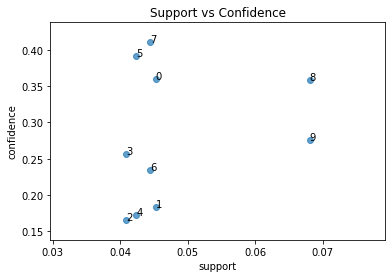

In [85]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
for i in range(rules.shape[0]):
    plt.text(rules.loc[i,"support"], rules.loc[i,"confidence"], str(i))
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

Now, you are ready to apply association rule mining to find interesting patterns. Please find more details about the libraries you used at: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ and http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/.